# Euro Analysis from 1999 to 2024

The Euro is one of the most influential currencies in global financial markets. Since its inception in 1999, the Euro has been the standard currency for the Eurozone, comprising 19 of the 27 European Union member states. This analysis aims to visualize the fluctuations of the Euro compared to other major world currencies, focusing on the US dollar and other relevant currencies. These visualizations will help us uncover trends and insights from the historical data on Euro exchange rates.

The dataset used for this analysis contains daily exchange rates of the Euro against multiple global currencies. By exploring these trends, we can better understand the impact of economic events, geopolitical shifts, and international crises on currency valuations.

A little summary of analysis made on this notebook:
- **Exchange Rate Trends of the Euro vs the US Dollar**
- **Exchange rate of Euro - US Dollar under the Last 4 USA Presidents**
- **Comparison of the Euro Againt Some Emerging Markets Currencies**
- **Volatility of the Exchange Rate of Euro and Some Emerging Market Currencies**
- **Conclusions**


You can find the dataset I used for the analysis on this [link](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020?resource=download).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')

In [4]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6535 entries, 0 to 6534
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6535 non-null   object 
 1   [Australian dollar ]      6535 non-null   object 
 2   [Bulgarian lev ]          6133 non-null   object 
 3   [Brazilian real ]         6267 non-null   object 
 4   [Canadian dollar ]        6535 non-null   object 
 5   [Swiss franc ]            6535 non-null   object 
 6   [Chinese yuan renminbi ]  6267 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6535 non-null   object 
 9   [Danish krone ]           6535 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6535 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6535 non-null   object 
 14  [Croatia

1) The dataset has 6535 rows.
2) Some columns have null values.
3) The dtypes are float64 and object.


**Initially, I will focus on the US DOLLAR**

## Data Preprocessing

The dataset contains 6535 rows with some columns having null values. To ensure the quality of the data, we need to address these missing values. We will also focus primarily on the US dollar exchange rate while exploring other currencies as well.

In the preprocessing phase, non-numeric values were converted, and relevant columns were selected for the analysis.

In [7]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar', 'Period\\Unit:': 'Time'}, inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)


In [8]:
euro_to_dollar = exchange_rates[['US_dollar', 'Time']]

In [9]:
euro_to_dollar['US_dollar'].value_counts()

US_dollar
-         62
1.2276     9
1.0808     8
1.1215     8
1.0867     8
          ..
1.4579     1
1.4607     1
1.4639     1
1.4651     1
1.086      1
Name: count, Length: 3785, dtype: int64

In [10]:
euro_to_dollar = euro_to_dollar[~euro_to_dollar['US_dollar'].str.contains('-')].copy()

In [11]:
euro_to_dollar['US_dollar'].value_counts()

US_dollar
1.2276    9
1.0867    8
1.0808    8
1.1215    8
1.0868    7
         ..
1.4579    1
1.4607    1
1.4639    1
1.4651    1
1.086     1
Name: count, Length: 3784, dtype: int64

In [12]:
euro_to_dollar.loc[:, 'US_dollar'] = euro_to_dollar['US_dollar'].astype(float)


In [13]:
euro_to_dollar['US_dollar'].info()

<class 'pandas.core.series.Series'>
Index: 6473 entries, 0 to 6534
Series name: US_dollar
Non-Null Count  Dtype 
--------------  ----- 
6473 non-null   object
dtypes: object(1)
memory usage: 101.1+ KB


## Exchange Rate Trends of the Euro vs US Dollar

The chart below highlights the Euro's exchange rate against the US dollar over time. Notable fluctuations can be observed during key events such as the 2008 financial crisis, the European sovereign debt crisis, and the COVID-19 pandemic in 2020.

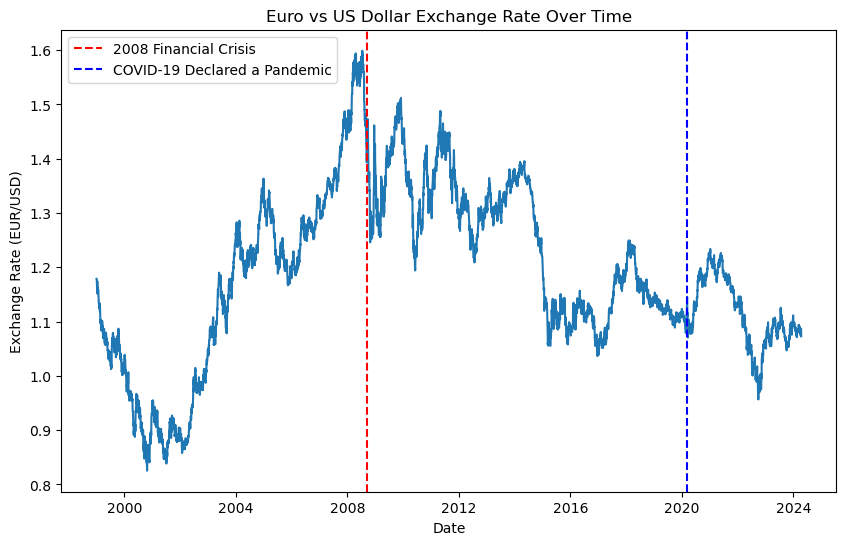

In [15]:
%matplotlib inline  
# Enables Jupyter to display graphs

plt.figure(figsize=(10, 6))
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Euro vs US Dollar Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (EUR/USD)')

# Adding event markers
plt.axvline(pd.to_datetime('2008-09-15'), color='r', linestyle='--', label='2008 Financial Crisis')
plt.axvline(pd.to_datetime('2020-03-11'), color='b', linestyle='--', label='COVID-19 Declared a Pandemic')

plt.legend()
plt.show()


In [16]:
euro_to_dollar.loc[:, 'rolling_mean30'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar.loc[:, 'rolling_mean365'] = euro_to_dollar['US_dollar'].rolling(365).mean()



#### Below, I compare the daily volatility of Euro-Dollar againt some moving averages.

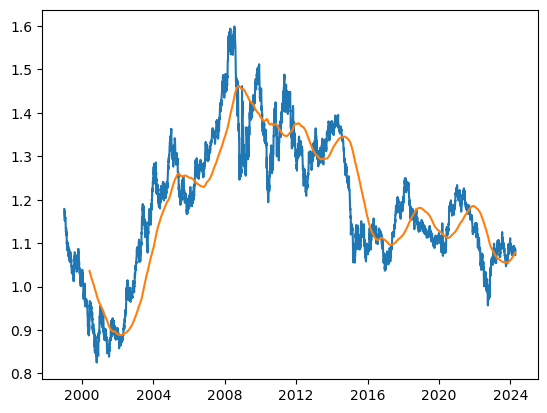

In [18]:
plt.plot(euro_to_dollar['Time'],euro_to_dollar['US_dollar'])
plt.plot(euro_to_dollar['Time'],euro_to_dollar['rolling_mean365']) # Rolling Mean of 365 days
plt.show()

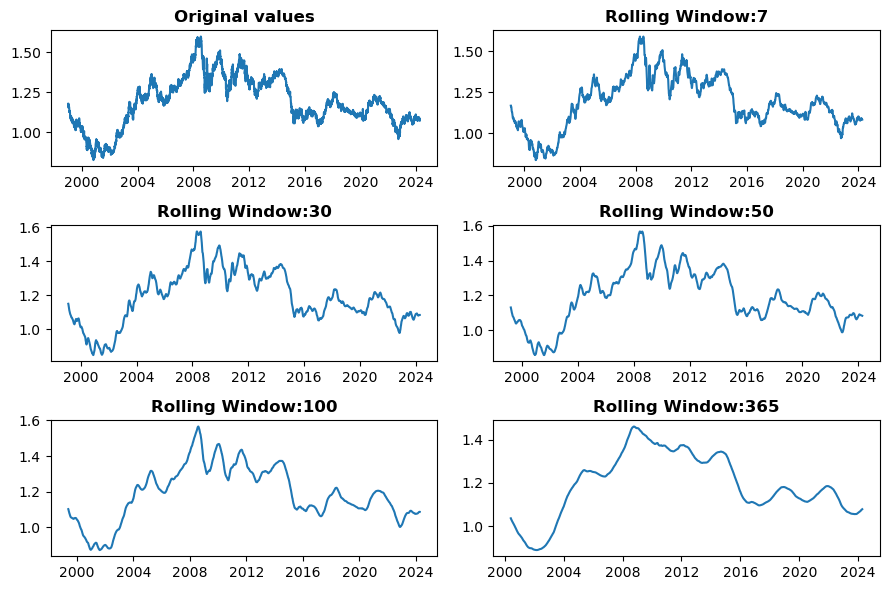

In [19]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Original values', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'],
             euro_to_dollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()

## Euro-Dollar for the last 4 USA Presidents

George W. Bush (2001-2009), Barack Obama (2009-2017), Donald Trump (2017-2021) and John Biden (2021-2024)

In [21]:
import matplotlib.style as style

In [22]:
# Separating presidencial periods for the following plots

bush_obama_trump_biden = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2024)]

bush = bush_obama_trump_biden.copy(
       )[bush_obama_trump_biden['Time'].dt.year < 2009]

obama = bush_obama_trump_biden.copy(
       )[(bush_obama_trump_biden['Time'].dt.year >= 2009) & (bush_obama_trump_biden['Time'].dt.year < 2017)]

trump = bush_obama_trump_biden.copy(
       )[(bush_obama_trump_biden['Time'].dt.year >= 2017) & (bush_obama_trump_biden['Time'].dt.year < 2021)]

biden = bush_obama_trump_biden.copy(    
)[(bush_obama_trump_biden['Time'].dt.year >= 2021) &  (bush_obama_trump_biden['Time'].dt.year < 2024)]


Figure saved as 'all_presidents_in_one_graph.png'


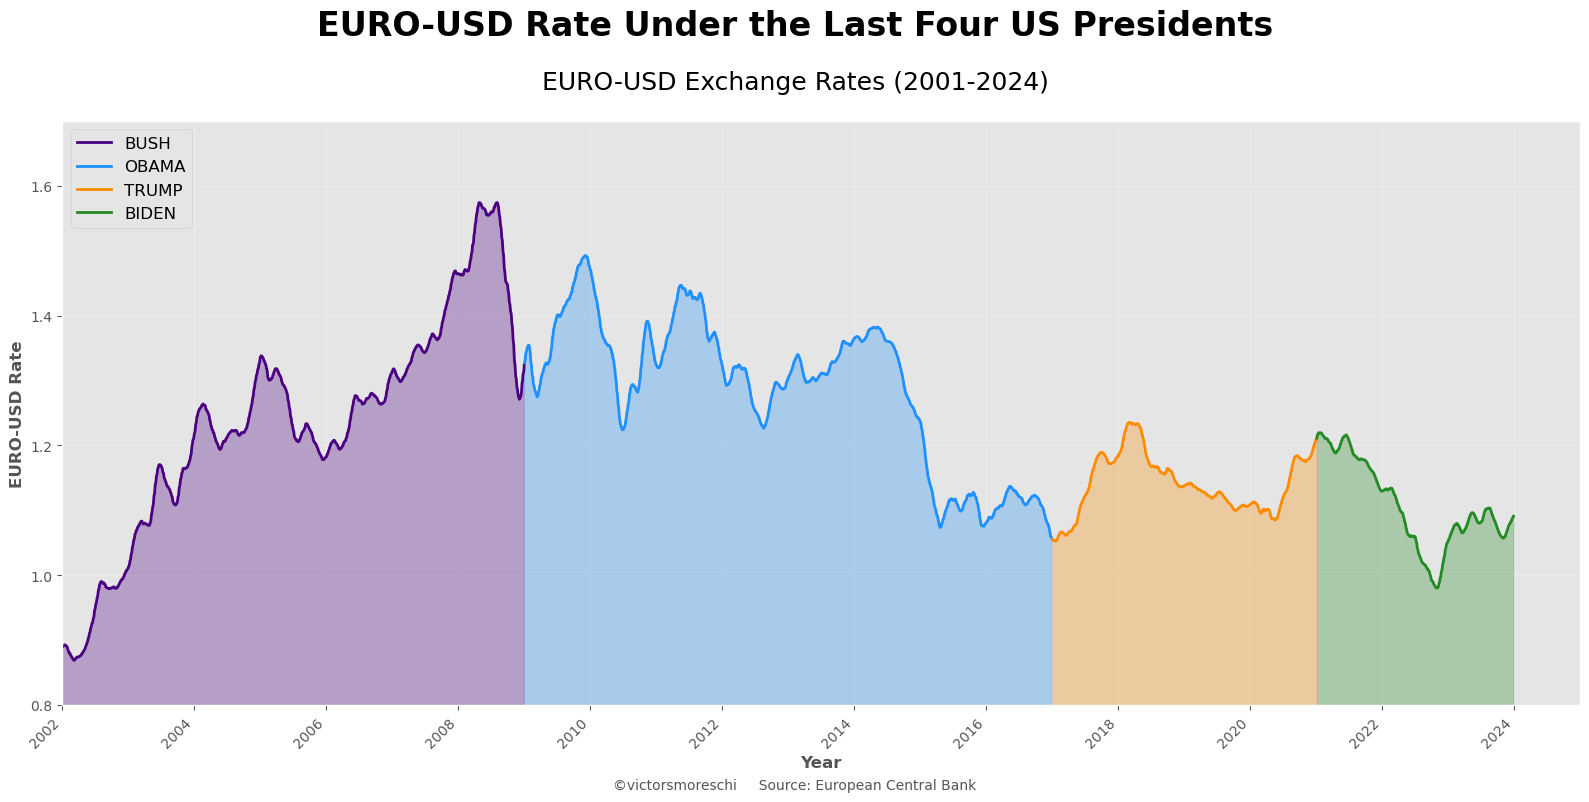

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import YearLocator, DateFormatter

plt.style.use('ggplot')

# Set up a single plot for all presidents
fig, ax = plt.subplots(figsize=(16, 8), dpi=100)

def plot_president(ax, data, name, color):
    ax.plot(data['Time'], data['rolling_mean30'], color=color, linewidth=2, label=name)
    ax.fill_between(data['Time'], data['rolling_mean30'], color=color, alpha=0.3)

    ax.set_ylim(0.8, 1.7)
    ax.set_xlim(pd.Timestamp('2002-01-01'), pd.Timestamp('2024-12-31'))  # Setting the x-axis range
    ax.set_yticks([0.8, 1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels([f'{x:.1f}' for x in [0.8, 1.0, 1.2, 1.4, 1.6]], fontsize=10)
    ax.set_ylabel('EURO-USD Rate', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    years = YearLocator(2)  # Label every 2 years for less clutter
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(DateFormatter('%Y'))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=10)

# Colors for the presidents
colors = ['#4B0082', '#1E90FF', '#FF8C00', '#228B22']

# Plot each president's data on the same graph
plot_president(ax, bush, 'BUSH', colors[0])
plot_president(ax, obama, 'OBAMA', colors[1])
plot_president(ax, trump, 'TRUMP', colors[2])
plot_president(ax, biden, 'BIDEN', colors[3])

# Add a legend to distinguish between the presidents
ax.legend(fontsize=12, loc='upper left')

ax.set_xlabel('Year', fontsize=12, fontweight='bold')

# Set the title and text for the plot
fig.suptitle('EURO-USD Rate Under the Last Four US Presidents', 
             fontsize=24, weight='bold', y=0.99)
fig.text(0.5, 0.89, 'EURO-USD Exchange Rates (2001-2024)', 
         fontsize=18, ha='center')

# Adjusted spacing 
fig.text(0.5, 0.02, '©victorsmoreschi     Source: European Central Bank',
         color='#555555', size=10, ha='center', va='center')

plt.tight_layout()
plt.subplots_adjust(top=0.85, bottom=0.12)  # Adjusted bottom for more space

# Save the figure
plt.savefig('all_presidents_in_one_graph.png', dpi=300, bbox_inches='tight')
print("Figure saved as 'all_presidents_in_one_graph.png'")


- During the BUSH presidency, the Euro became strong against the dollar, reaching its **historical peak in 2008**, right after the subprime crisis. In Obama's period, the dollar kept weak for almost 6 years, but by the end of 2015, the **FED** raised the **FED FUNDS**, attracting more capital to the USD currency.

- Trump or Biden had a currency flutuating around the mean of 1.13 Dollar for an Euro. By the end of the pandemics and after a big positive spike of inflation, the **FED** raised the **FED FUNDS** like in 2015. On this occasion, **you can notice on the graph the devaluation of the euro against the dollar in 2022.** The graph below has a line indicating the mean euro-dollar value in the period.

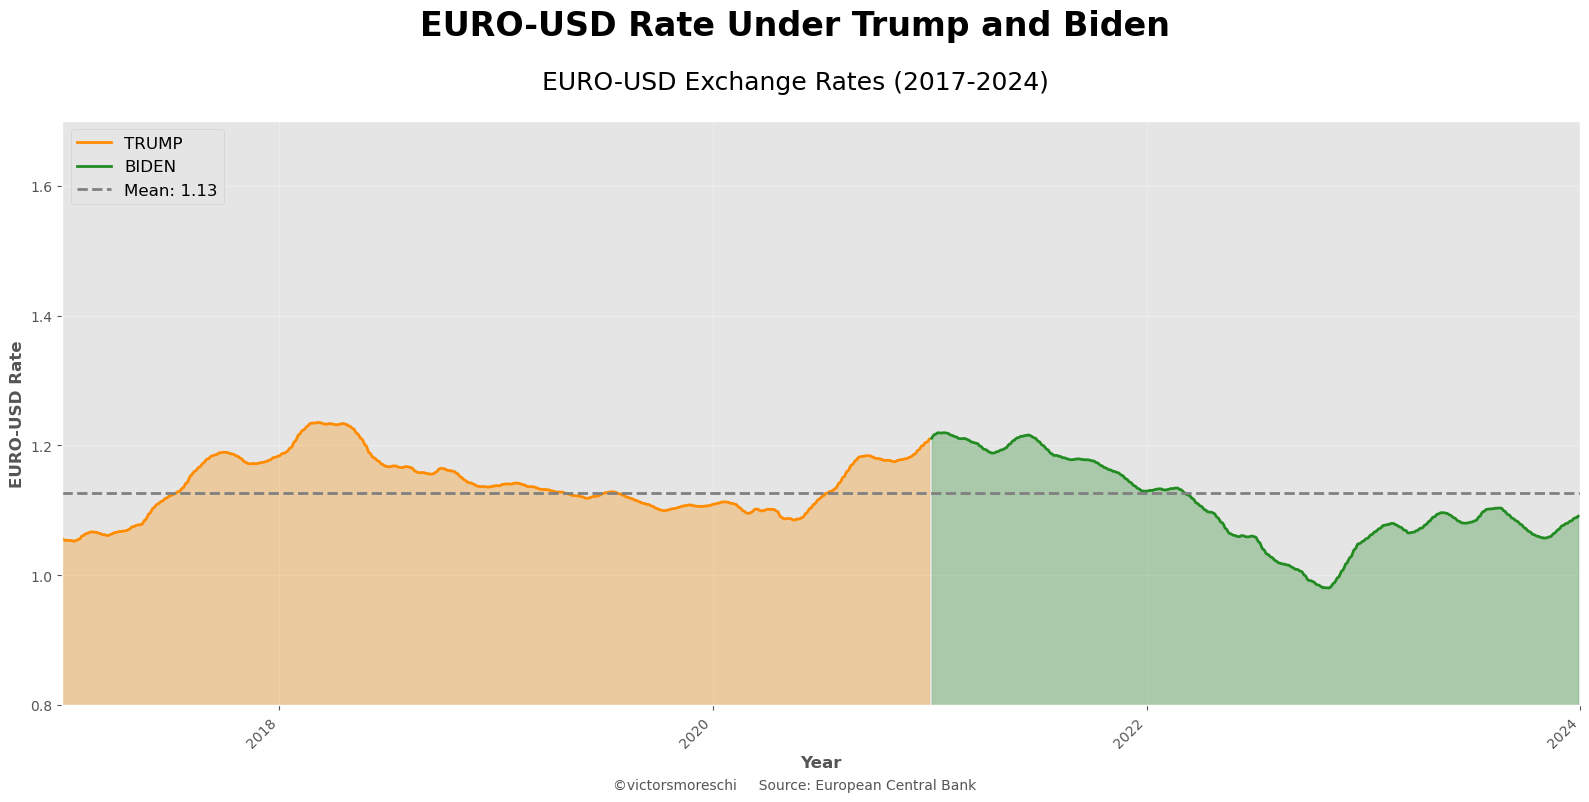

In [25]:
plt.style.use('ggplot')

# Set up a single plot for all presidents
fig, ax = plt.subplots(figsize=(16, 8), dpi=100)

def plot_president2(ax, data, name, color):
    ax.plot(data['Time'], data['rolling_mean30'], color=color, linewidth=2, label=name)
    ax.fill_between(data['Time'], data['rolling_mean30'], color=color, alpha=0.3)

    ax.set_ylim(0.8, 1.7)
    ax.set_xlim(pd.Timestamp('2017-01-01'), pd.Timestamp('2024-01-01'))  # Setting the x-axis range
    ax.set_yticks([0.8, 1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels([f'{x:.1f}' for x in [0.8, 1.0, 1.2, 1.4, 1.6]], fontsize=10)
    ax.set_ylabel('EURO-USD Rate', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    years = YearLocator(2)  # Label every 2 years for less clutter
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(DateFormatter('%Y'))
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right', fontsize=10)

# Colors for the presidents
colors = ['#4B0082', '#1E90FF', '#FF8C00', '#228B22']

# Plot each president's data on the same graph
plot_president2(ax, trump, 'TRUMP', colors[2])
plot_president2(ax, biden, 'BIDEN', colors[3])

# Calculate the mean value across both Trump and Biden periods
mean_trump_biden = pd.concat([trump['rolling_mean30'], biden['rolling_mean30']]).mean()

# Plot the mean line across the graph
ax.axhline(mean_trump_biden, color='gray', linestyle='--', linewidth=2, label=f'Mean: {mean_trump_biden:.2f}')

# Add a legend to distinguish between the presidents
ax.legend(fontsize=12, loc='upper left')

ax.set_xlabel('Year', fontsize=12, fontweight='bold')

# Set the title and text for the plot
fig.suptitle('EURO-USD Rate Under Trump and Biden', 
             fontsize=24, weight='bold', y=0.99)
fig.text(0.5, 0.89, 'EURO-USD Exchange Rates (2017-2024)', 
         fontsize=18, ha='center')

# Adjusted spacing 
fig.text(0.5, 0.02, '©victorsmoreschi     Source: European Central Bank',
         color='#555555', size=10, ha='center', va='center')

plt.tight_layout()
plt.subplots_adjust(top=0.85, bottom=0.12)  # Adjusted bottom for more space

# Save the figure
plt.savefig('trump_biden_in_one_graph.png', dpi=300, bbox_inches='tight')

## Comparing the Euro againt some emerging markets currencies
---
**I will use some currencies I have more interest:**

- Brazillian Real
- Chinese Yuan
- Polish Sloty
- Mexican Peso
- Turkish Lira

In [27]:
exchange_rates.rename(columns={'[Brazilian real ]': 'BR_real', '[Chinese yuan renminbi ]': 'CN_yuan',
                               '[Polish zloty ]':'PL_zloty', '[Mexican peso ]':'MX_peso', '[Turkish lira ]':'TU_lira'},
                      inplace=True)
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [28]:
euro_to_emerging = exchange_rates[['BR_real','CN_yuan','PL_zloty','MX_peso','TU_lira', 'Time']]

In [29]:
euro_to_emerging.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6535 entries, 0 to 6534
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   BR_real   6267 non-null   object        
 1   CN_yuan   6267 non-null   object        
 2   PL_zloty  6535 non-null   object        
 3   MX_peso   6535 non-null   object        
 4   TU_lira   6473 non-null   float64       
 5   Time      6535 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 306.5+ KB


In [30]:
print(euro_to_emerging.shape)

(6535, 6)


In [31]:
euro_to_emerging_c = euro_to_emerging.dropna()

In [32]:
print(euro_to_emerging_c.shape)

(6206, 6)


In [33]:
euro_to_emerging_c.loc[:, ['BR_real', 'CN_yuan', 'PL_zloty', 'MX_peso', 'TU_lira']] = euro_to_emerging_c.loc[:, ['BR_real', 'CN_yuan', 'PL_zloty', 'MX_peso', 'TU_lira']].astype(float)

### Daily Oscilation of Euro Against Emerging Markets Currencies

For us, Brazillians, the Real looks really instable. If you look to the graph, from 2000 to 2024, the Real lost more then 50% of its value compared to the Euro. On the other side, Mexican Pesos and Turkish Liras had an even worse result. **After 2016, the Turkish Lira showed an exponencial lost of value.**

Poland is a country which is really getting on tracks with economic policies and being the 'farm of Europe'. Thus, the Poland Zloty have been showing stable oscilations around 5 slotz for 1 Euro.
**China uses a fixed exchange rate**, therefore, the Chinese Central Bank intervenes in the foreign exchange market to stabilize the currency. This policy have either good sides and bad sides.

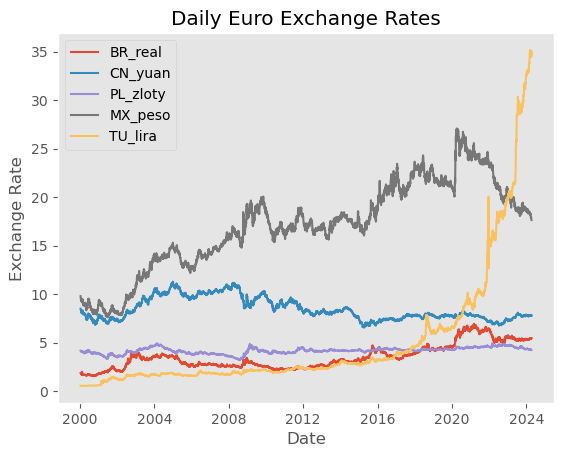

In [35]:
plt.plot(euro_to_emerging_c['Time'],euro_to_emerging_c['BR_real'], label = 'BR_real')# plot daily variation of the exchange rate
plt.plot(euro_to_emerging_c['Time'],euro_to_emerging_c['CN_yuan'], label = 'CN_yuan')
plt.plot(euro_to_emerging_c['Time'],euro_to_emerging_c['PL_zloty'], label = 'PL_zloty')
plt.plot(euro_to_emerging_c['Time'],euro_to_emerging_c['MX_peso'], label = 'MX_peso')
plt.plot(euro_to_emerging_c['Time'],euro_to_emerging_c['TU_lira'], label = 'TU_lira')
plt.legend()
plt.title('Daily Euro Exchange Rates')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(False)
plt.show()

### 30 days Rolling Mean of Euro against emerging market currencies

Just to see the graph in a smoothed way

In [37]:
euro_to_emerging_c = euro_to_emerging_c.copy()

# Calculate rolling mean
for column in ['BR_real', 'CN_yuan', 'PL_zloty', 'MX_peso', 'TU_lira']:
    euro_to_emerging_c.loc[:, f'{column}_rolling_mean30'] = euro_to_emerging_c[column].rolling(window=30).mean()

# Calculate standard deviation of rolling mean
for column in ['BR_real', 'CN_yuan', 'PL_zloty', 'MX_peso', 'TU_lira']:
    euro_to_emerging_c.loc[:, f'{column}_rolling_std30'] = euro_to_emerging_c[f'{column}_rolling_mean30'].rolling(window=30).std()

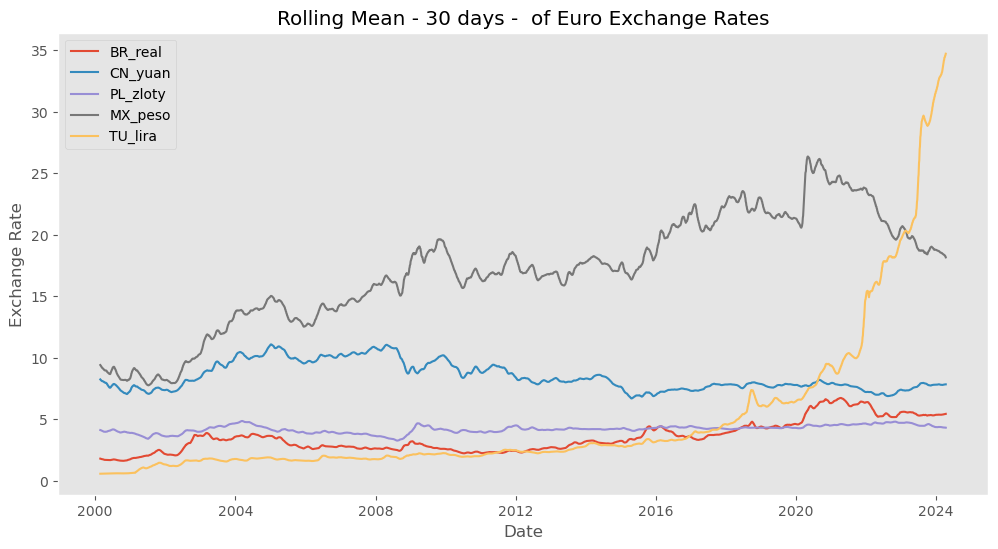

In [38]:
# Plotting
plt.figure(figsize=(12, 6))

for country, currencies in zip(['BR_real_rolling_mean30', 'CN_yuan_rolling_mean30', 'PL_zloty_rolling_mean30', 'MX_peso_rolling_mean30', 'TU_lira_rolling_mean30'], 
                               ['BR_real', 'CN_yuan', 'PL_zloty', 'MX_peso', 'TU_lira']):
    plt.plot(euro_to_emerging_c['Time'], euro_to_emerging_c[country], label=currencies)

plt.legend()
plt.grid(False)
plt.title('Rolling Mean - 30 days -  of Euro Exchange Rates')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

In [39]:
euro_to_emerging_c['BR_real_rolling_std30']

268          NaN
269          NaN
270          NaN
271          NaN
272          NaN
          ...   
6530    0.019852
6531    0.020703
6532    0.021486
6533    0.022154
6534    0.022784
Name: BR_real_rolling_std30, Length: 6206, dtype: float64

### Standard Deviation of 30 days Euro Rolling Mean

* The standard deviation is used as a simple way to measure volatility. The volatility measures the uncertainty about the value of an asset.

  Therefore, it is clear that the currencies with the highest volatility are the ones that lost more value against the Euro in a certain period. Below the graph, there are 2 calculations showing the correlation between currency value and its volatility.

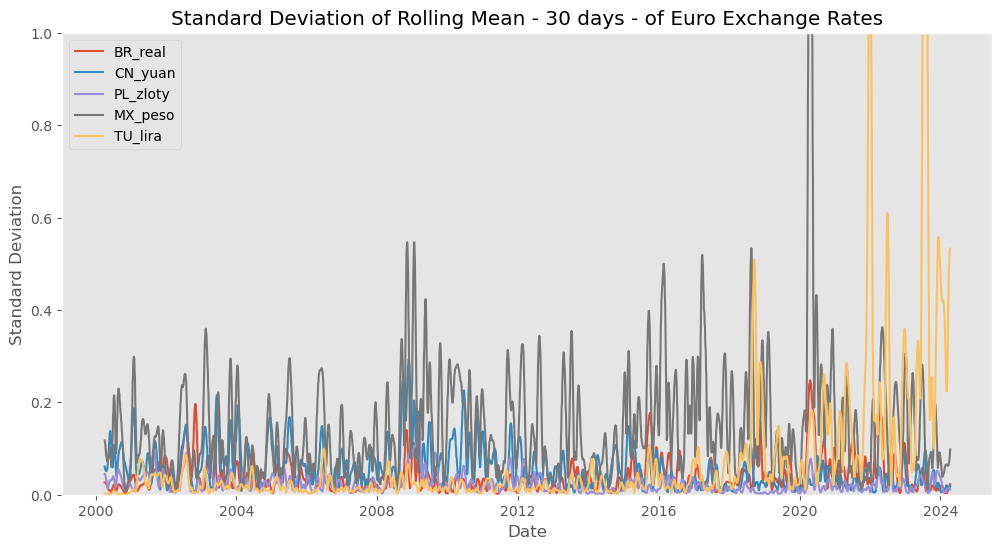

In [41]:
# Plotting standard deviation
plt.figure(figsize=(12, 6))

for country, currencies in zip(['BR_real_rolling_std30', 'CN_yuan_rolling_std30', 'PL_zloty_rolling_std30', 'MX_peso_rolling_std30', 'TU_lira_rolling_std30'], 
                               ['BR_real', 'CN_yuan', 'PL_zloty', 'MX_peso', 'TU_lira']):
    plt.plot(euro_to_emerging_c['Time'], euro_to_emerging_c[country], label=currencies)

plt.legend()
plt.grid(False)
plt.title('Standard Deviation of Rolling Mean - 30 days - of Euro Exchange Rates')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.ylim(0, 1)
plt.show()

In [42]:
euro_to_emerging_c['BR_real'].corr(euro_to_emerging_c['BR_real_rolling_std30']) # Correlation between volatility and lost of value from BR Real

0.35376186866780207

In [43]:
euro_to_emerging_c['TU_lira'].corr(euro_to_emerging_c['TU_lira_rolling_std30']) # Correlation between volatility and lost of value from Turkish Lira

0.6665625867096333

#### Below, an easier visualization of the volatilities

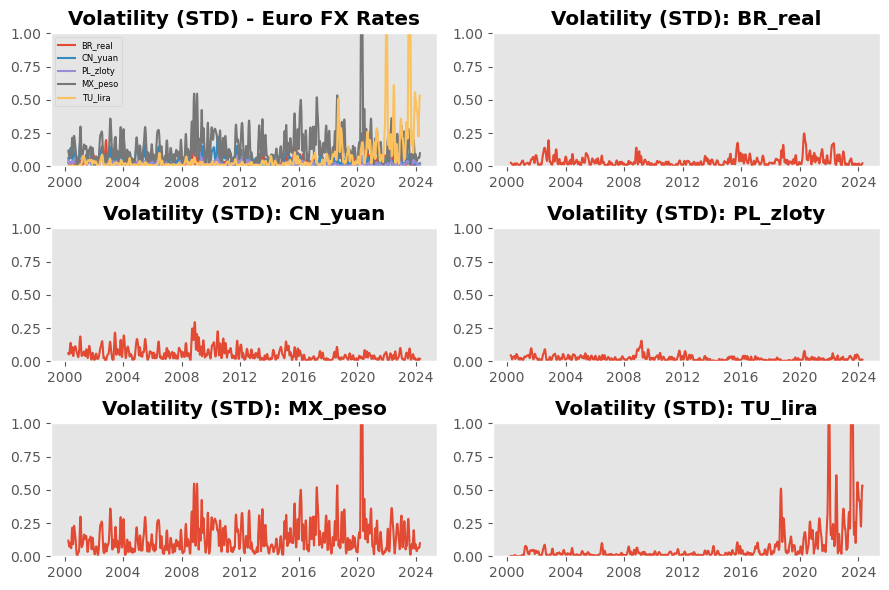

In [45]:
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
for country, currencies in zip(['BR_real_rolling_std30', 'CN_yuan_rolling_std30', 'PL_zloty_rolling_std30', 'MX_peso_rolling_std30', 'TU_lira_rolling_std30'], 
                               ['BR_real', 'CN_yuan', 'PL_zloty', 'MX_peso', 'TU_lira']):
    plt.plot(euro_to_emerging_c['Time'], euro_to_emerging_c[country], label=currencies)

plt.grid(False)
plt.title('Volatility (STD) - Euro FX Rates', weight = 'bold')
plt.ylim(0, 1)
plt.legend(fontsize = 6)


for i, country, currencies in zip([2,3,4,5,6], ['BR_real_rolling_std30', 'CN_yuan_rolling_std30', 'PL_zloty_rolling_std30', 'MX_peso_rolling_std30', 'TU_lira_rolling_std30'], 
                               ['BR_real', 'CN_yuan', 'PL_zloty', 'MX_peso', 'TU_lira']):
    plt.subplot(3,2,i)
    plt.plot(euro_to_emerging_c['Time'],
             euro_to_emerging_c[country])
    plt.title('Volatility (STD): ' + str(currencies), weight='bold')
    plt.grid(False)
    plt.ylim(0,1)

plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()

The scatter plot of the Turkish Lira Exchange Rate and its own standad deviation has a pretty weird form, but **it is possible to see some positive correlatio between both.**

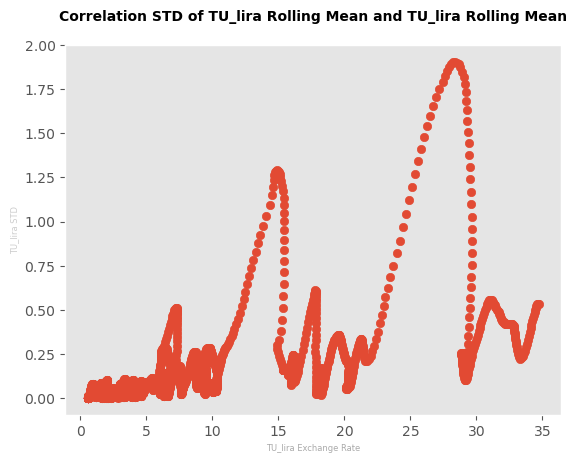

In [47]:
plt.scatter(euro_to_emerging_c['TU_lira_rolling_mean30'], euro_to_emerging_c['TU_lira_rolling_std30'])
plt.title('Correlation STD of TU_lira Rolling Mean and TU_lira Rolling Mean''\n', weight = 'bold', fontsize = 10)  
plt.xlabel('TU_lira Exchange Rate', fontsize = 6, alpha = 0.5)
plt.ylabel('TU_lira STD', fontsize = 6, alpha = 0.3)
plt.grid(False)
plt.show()

## Conclusions

This analysis has provided insights into how the Euro's exchange rate fluctuates against major global currencies, particularly the US dollar. Through visualization, we identified key periods of volatility, influenced by economic crises, political changes, and global events.

Summaring, the most interesting conclusions are:

- For one decade, around 2004 to 2014, the Euro was really strong against the dollar. Fact that increased with the subprime crisis. After this period, Europe started to have growth problems and the USA also raised its interest rate in 2015 and in 2022, which made the dollar stronger. The exchange rate now is near the 2002-2003 level.]
- Besides their differences, Trump and Biden showed almost the same exchange rate under their presidency in the Euro-Dollar pair.
- The Turkish Lira exponencially lost value in the global market in the last years. Mexican pesos and Brazillian Reais also, but in a smaller scale.
- Polish Zloty had  kept a similar exchange rate under the period of analysis